### This notebook fits photon counting histograms (PCH)
Note that you need to have simulation.csv.zip from the sim_fcs simulation (or from experimental data) loaded into your workspace.
Click here to open in google colab: http://colab.research.google.com/github/jayunruh/pysimfcs/blob/main/fit_pch.ipynb

In [1]:
#if you are using this from google colab, you need the utility modules
#(everything else should already be installed)
import os
if(not os.path.exists('pysimfcs_utils.py')):
    print('downloading pysimfcs libraries')
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/pysimfcs_utils.py
if(not os.path.exists('analysis_utils.py')):
    !wget https://raw.githubusercontent.com/jayunruh/pysimfcs/refs/heads/main/analysis_utils.py
else:
    print('libraries already downloaded')

libraries already downloaded


In [1]:
#see fit_correlations for the descriptions of imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis_utils as simutils
import scipy.optimize as so

In [2]:
simdf=pd.read_csv('simulation.csv.zip',index_col=0)

In [3]:
simdf.head()

,x,ch1,ch2
0,0.00000,1,1
1,0.00005,2,1
2,0.00010,4,3
3,0.00015,7,6
4,0.00020,4,7


In [4]:
simdf.max()

x       6.5536
ch1    31.0000
ch2    21.0000
dtype: float64

In [5]:
avgint=simdf['ch1'].mean()
nbbright=simdf['ch1'].var()/avgint-1
nbnum=avgint/nbbright
gval=0.3536
print('intensity',avgint,'brightness',nbbright/gval,'number',nbnum*gval)

intensity 2.8990554809570312 brightness 4.86080068652433 number 0.5964152138544019


In [6]:
pch1,xvals=np.histogram(simdf['ch1'],bins=np.arange(25))
normpch1=pch1.astype(float)
totint=normpch1.sum()
normpch1/=totint
xvals=xvals[:-1]

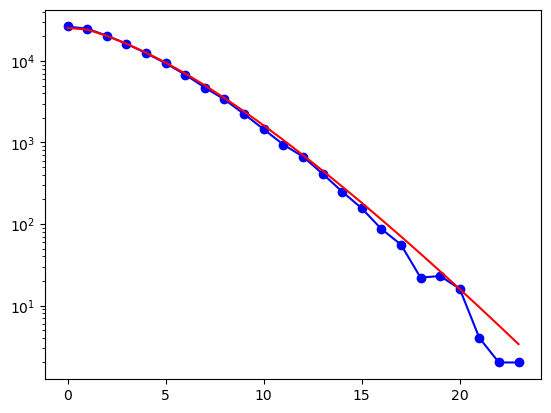

In [7]:
fit=simutils.pchfunc(xvals,*[0.0,5.0,0.6])
plt.plot(xvals,pch1,'bo-')
plt.plot(xvals,fit*totint,'r-')
plt.yscale('log')

In [8]:
weights=simutils.getpchweights(pch1)

In [9]:
guessparams=[0.0001,5.0,0.6]
ulims=[0.01,20.0,10.0]
llims=[0.0,0.1,0.1]

In [10]:
weights

array([164273.96552845, 161714.77155148, 155256.58627421, 149614.26019368,
       144876.55729839, 141167.05457817, 138233.07886225, 135964.0932697 ,
       134533.09402653, 133343.73697773, 132540.28793069, 132021.84820214,
       131745.4527684 , 131486.31180113, 131321.47775204, 131227.18589161,
       131158.05778568, 131127.02393619, 131093.00369328, 131094.00403669,
       131087.00195338, 131075.00012207, 131073.00003052, 131073.00003052])

In [11]:
fparams,fcov=so.curve_fit(simutils.pchfunc,xvals,normpch1,
             p0=guessparams,sigma=1.0/weights,bounds=(llims,ulims),method='trf')
fit=simutils.pchfunc(xvals,*fparams)

In [12]:
fparams

array([1.12697269e-03, 4.92792571e+00, 5.89248021e-01])

Text(0, 0.5, 'frequency')

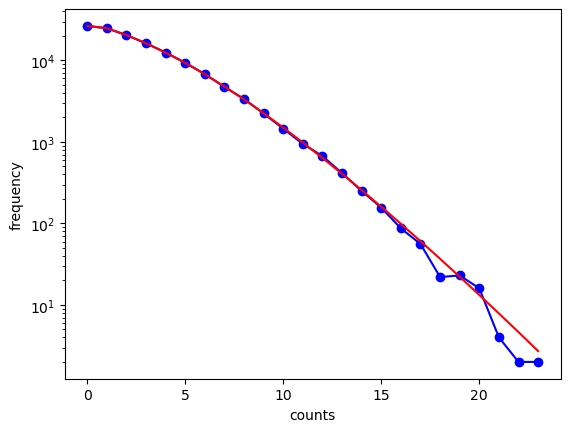

In [14]:
plt.plot(xvals,pch1,'bo-')
plt.plot(xvals,fit*totint,'r-')
plt.yscale('log')
plt.xlabel('counts')
plt.ylabel('frequency')